In [1]:
from pandas_datareader import data
import datetime
from bokeh.plotting import figure, show, output_file
import bokeh
from bokeh.embed import components
from bokeh.resources import CDN

## 1. Importing the Dataset
In this project, we will make use of the stock price of Apple, with the ticker name 'AAPL' for the period of 10 trading days, starting from May 16, 2022 up to May 28, 2022. The dataset is retrieved from Yahoo! Finance. The dataset contains the opening, closing, highest, and lowest stock price per each trading days as well as the amount/volume of stocks traded per day. 

In [2]:
start=datetime.datetime(2022,4,1)
end=datetime.datetime(2022,5,28)
df = data.DataReader(name= "AAPL", data_source="yahoo", start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.353836
2022-04-01,174.880005,171.940002,174.029999,174.309998,78751300.0,174.054260
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.178207
2022-04-05,178.300003,174.419998,177.500000,175.059998,73401800.0,174.803162
2022-04-06,173.630005,170.130005,172.360001,171.830002,89058800.0,171.577911


## 2. Building Chart Candlesticks with Bokeh Rectangles
To build the candlestick, we will make use of Bokeh, a Python library utilized to create interactive visualizations for modern web browsers. In addition, Bokeh also enables the creation of JavaScript-powered visualizations without writing any JavaScript yourself. In this case, we will apply a rectangular class in Bokeh to create each candle. Before plotting, we need to preprocess our data to provide all necessary arguments for Bokeh. Those arguments include :

1. The x-coordinates of the centers of the rectangles
It will be every index of the trading day when the stock price is increasing or decreasing. A new column called `Status` has been added to the Dataframe to show movement of stock price.
2. The y-coordinates of the centers of the rectangles.
It will be the middle point between the open and stock price. A new column called 'Middle' has been calculated. 
3. The overall widths of the rectangles
It will be the duration of trading in milliseconds. 
4. The overall heights of the rectangles.
It will be taken from absolute value of the result of substraction between opening and closing price. 

In [3]:
def increase_decrease(close_price, open_price):
    """
    This function specify whether the stock price is increasing or decreasing for each trading day
    """
    if close_price > open_price:
        value = "Increase"
    elif close_price < open_price:
        value = "Decrease"
    else:
        value="Equal"
    return value

df["Status"]=[increase_decrease(close_price, open_price) for close_price, open_price in zip(df.Close, df.Open)]
df["Middle"]= (df.Open+df.Close)/2
df["Width"] = 12*60*60*1000
df["Height"]= abs(df.Open-df.Close)
df.head()

,High,Low,Open,Close,Volume,Adj Close,Status,Middle,Width,Height
Date,,,,,,,,,,
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.353836,Decrease,176.224998,43200000,3.229996
2022-04-01,174.880005,171.940002,174.029999,174.309998,78751300.0,174.054260,Increase,174.169998,43200000,0.279999
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.178207,Increase,176.505005,43200000,3.869995
2022-04-05,178.300003,174.419998,177.500000,175.059998,73401800.0,174.803162,Decrease,176.279999,43200000,2.440002
2022-04-06,173.630005,170.130005,172.360001,171.830002,89058800.0,171.577911,Decrease,172.095001,43200000,0.529999


In [9]:
# set the dimension of the working space
p = figure(x_axis_type='datetime', width=1000, height = 300)
# set the title of the figure
p.title.text = "Candlestick Chart"
# set the transparency of the grid
p.grid.grid_line_alpha = 0.3

# set the line for the high and low price
# arguments : The x and y-coordinates of the starting points, The x and y-coordinates of the ending points
p.segment(df.index, df.High, df.index, df.Low, color="Black")

p.rect(df.index[df.Status=="Increase"], df.Middle[df.Status=="Increase"], 
       df.Width, df.Height[df.Status=="Increase"], fill_color="#7fff00", line_color="black") 

p.rect(df.index[df.Status=="Decrease"], df.Middle[df.Status=="Decrease"], 
      df.Width, df.Height[df.Status=="Decrease"], fill_color="#FF3333", line_color="black") 

# outpout the diagram in the local directory
output_file("CS.html")
show(p)

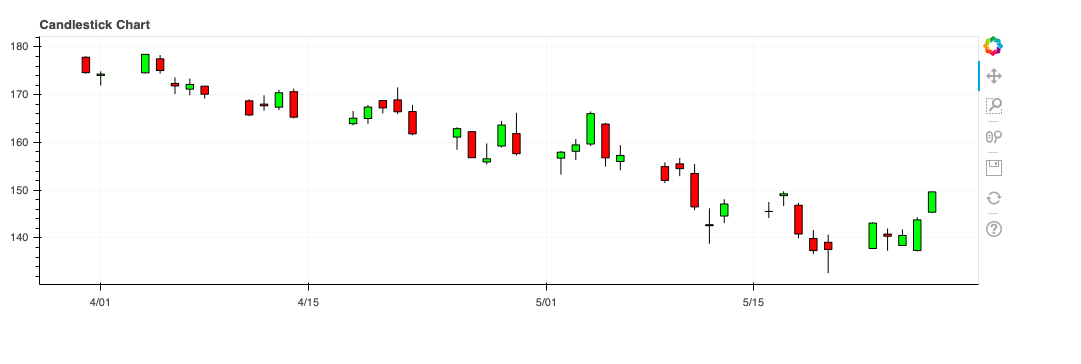